In [2]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
df = pd.read_csv(r'C:\Users\PC\Desktop\RAIN\semester 1\Machine Learning\cardiovascular\cardio_train.csv', delimiter= ';')

In [4]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


EXPLORATORY DATA ANALYSIS for classification data

In [5]:
#to know the numbers of rows and columns
df.shape

(70000, 13)

In [6]:
#missing values
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

<Axes: xlabel='weight', ylabel='Density'>

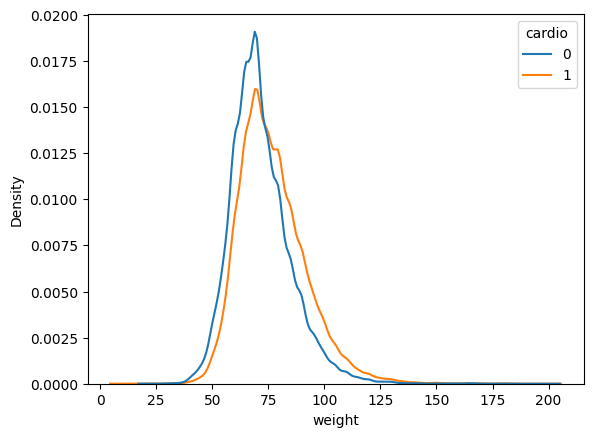

In [7]:
#plot the distribution to check how data is distributed
#for numerical to categorical
sns.kdeplot(x = df['weight'], hue=df['cardio'])

<Axes: xlabel='ap_hi', ylabel='Density'>

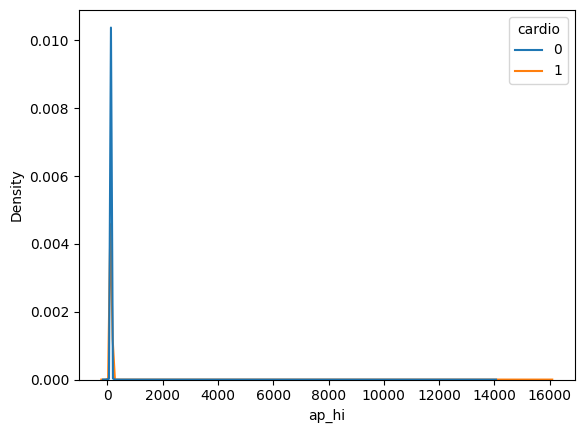

In [8]:
sns.kdeplot(x = df['ap_hi'], hue=df['cardio'])

<Axes: xlabel='ap_lo', ylabel='Density'>

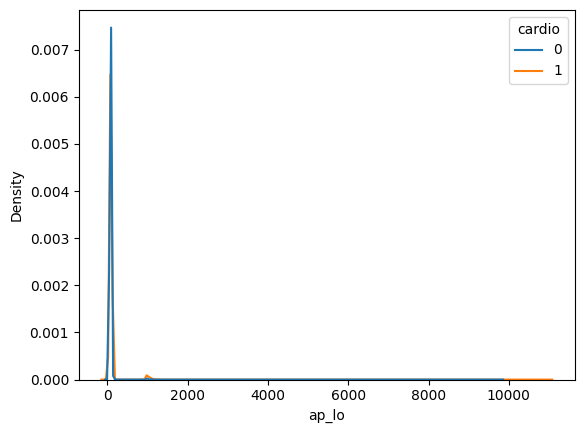

In [9]:
sns.kdeplot(x = df['ap_lo'], hue=df['cardio'])

<Axes: xlabel='cholesterol', ylabel='count'>

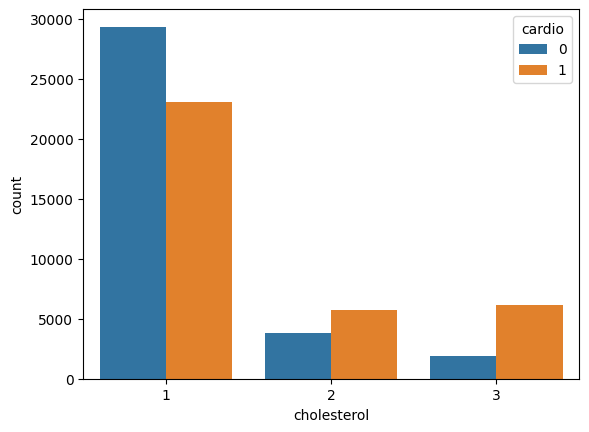

In [10]:
#plot the distribution to check how data is distributed
#for categorical to categorical
sns.countplot(x = df['cholesterol'], hue= df['cardio'])

<Axes: xlabel='gluc', ylabel='count'>

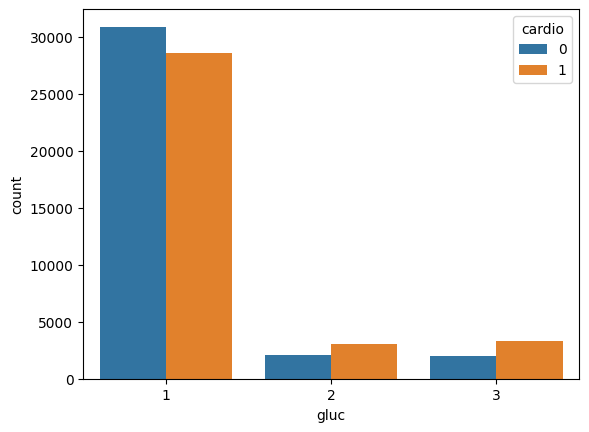

In [11]:
sns.countplot(x = df['gluc'], hue= df['cardio'])

<Axes: xlabel='smoke', ylabel='count'>

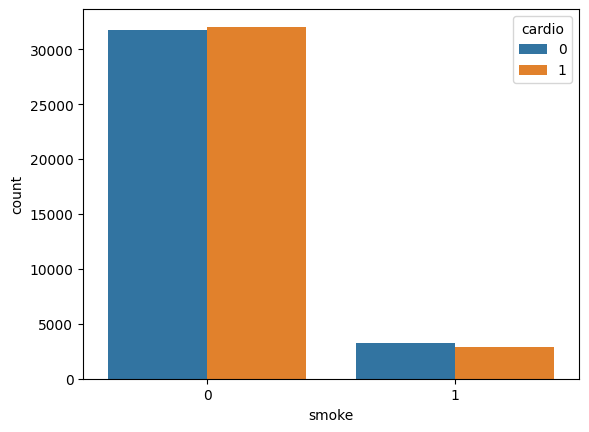

In [12]:
sns.countplot(x = df['smoke'], hue= df['cardio'])

<Axes: xlabel='gender', ylabel='count'>

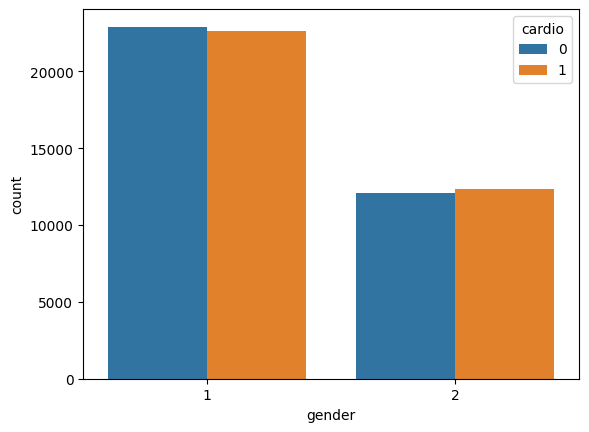

In [13]:
sns.countplot(x = df['gender'], hue= df['cardio'])

<Axes: xlabel='active', ylabel='count'>

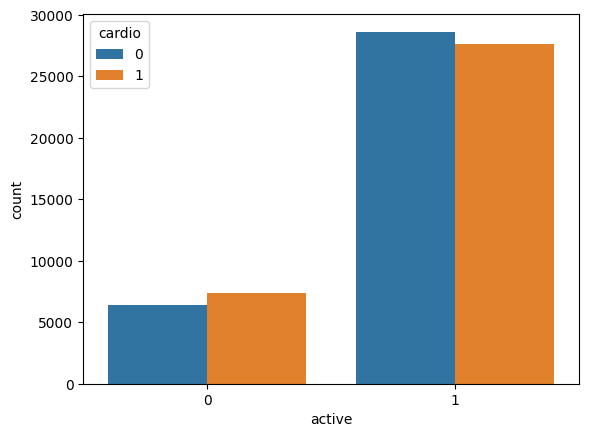

In [14]:
sns.countplot(x = df['active'], hue= df['cardio'])

<Axes: xlabel='alco', ylabel='count'>

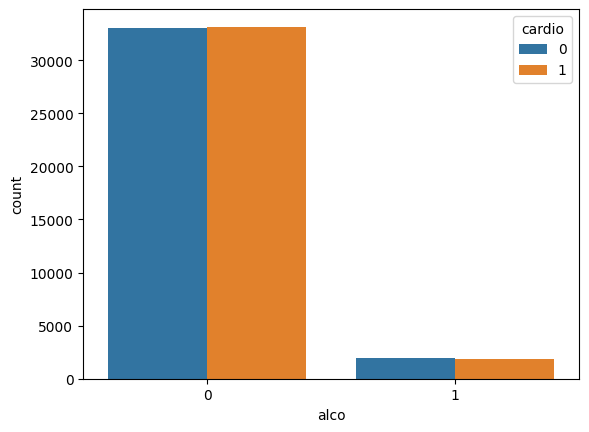

In [15]:
sns.countplot(x = df['alco'], hue= df['cardio'])

In [16]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [17]:
df2= df.drop(['id', 'smoke', 'alco', 'gender'], axis=1)

In [18]:
df2.head()

,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,active,cardio
0,18393,168,62.0,110,80,1,1,1,0
1,20228,156,85.0,140,90,3,1,1,1
2,18857,165,64.0,130,70,3,1,0,1
3,17623,169,82.0,150,100,1,1,1,1
4,17474,156,56.0,100,60,1,1,0,0


In [19]:
#creating a new feature
#BMI
df2['BMI'] = (df2['weight']/ ((df2['height']/100)**2))
df2['BP_ratio'] = df2['ap_hi']/ df2['ap_lo']

In [20]:
#since i don't need height, weight, ap-lo and ap_hi so i will drop it
df2_selected = df2.drop(['height', 'weight', 'ap_hi', 'ap_lo'], axis =1)
df2_selected

,age,cholesterol,gluc,active,cardio,BMI,BP_ratio
0,18393,1,1,1,0,21.967120,1.375000
1,20228,3,1,1,1,34.927679,1.555556
2,18857,3,1,0,1,23.507805,1.857143
3,17623,1,1,1,1,28.710479,1.500000
4,17474,1,1,0,0,23.011177,1.666667
...,...,...,...,...,...,...,...
69995,19240,1,1,1,0,26.927438,1.500000
69996,22601,2,2,1,1,50.472681,1.555556
69997,19066,3,1,0,1,31.353579,2.000000
69998,22431,1,2,0,1,27.099251,1.687500


In [21]:
df2_selected.replace([np.inf, -np.inf], np.nan, inplace=True)

In [22]:
df2_selected.isnull().sum()

age             0
cholesterol     0
gluc            0
active          0
cardio          0
BMI             0
BP_ratio       21
dtype: int64

In [23]:
df2_selected.dropna(axis=0, inplace= True)

In [24]:
#imbalance is a problem of classification


In [25]:
X = df2_selected.drop(['cardio'], axis = 1)
y = df2_selected['cardio']

In [26]:
y.value_counts()

0    35006
1    34973
Name: cardio, dtype: int64

In [27]:
#model Training
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, random_state=11)

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
lr = LogisticRegression(max_iter= int(1000))
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [31]:
lr.score(X_test, y_test)

0.5724492712203487

In [32]:
lr.score(X_train, y_train)

0.5756456057976932

In [33]:
#decision tree classsifier
from sklearn.tree import DecisionTreeClassifier

In [34]:
dtc = DecisionTreeClassifier(random_state=5, max_depth=20)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, random_state=5)

In [35]:
dtc.score(X_test, y_test)

0.6549966657140135

In [36]:
dtc.score(X_train, y_train)

0.8767377768704705

#HANDLING CLASS IMBALANCE

STRATIFIED SAMPLING

RE SAMPLING

WEIGHTS

BALANCED BAGGING CLASS